In [37]:
import os
os.getcwd()

'C:\\Users\\HP\\Desktop\\letsupgrade_python'

In [38]:
os.chdir('C:\\Users\\HP\\Desktop\\letsupgrade_python')
os.getcwd()

'C:\\Users\\HP\\Desktop\\letsupgrade_python'

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
dataset = pd.read_csv("House Price.csv")
dataset.head()

,Id,LotFrontage,LotArea,Alley,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,NaN,196.0,856,854,1710,Attchd,548,208500
1,2,80.0,9600,NaN,0.0,1262,0,1262,Attchd,460,181500
2,3,68.0,11250,NaN,162.0,920,866,1786,Attchd,608,223500
3,4,60.0,9550,NaN,0.0,961,756,1717,Detchd,642,140000
4,5,84.0,14260,NaN,350.0,1145,1053,2198,Attchd,836,250000


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1460 non-null   int64  
 1   LotFrontage  1201 non-null   float64
 2   LotArea      1460 non-null   int64  
 3   Alley        91 non-null     object 
 4   MasVnrArea   1452 non-null   float64
 5   1stFlrSF     1460 non-null   int64  
 6   2ndFlrSF     1460 non-null   int64  
 7   GrLivArea    1460 non-null   int64  
 8   GarageType   1379 non-null   object 
 9   GarageArea   1460 non-null   int64  
 10  SalePrice    1460 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 125.6+ KB


In [42]:
print(dataset.shape)

(1460, 11)


In [43]:
#check missing value
dataset.isnull().sum()

Id                0
LotFrontage     259
LotArea           0
Alley          1369
MasVnrArea        8
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
GarageType       81
GarageArea        0
SalePrice         0
dtype: int64

In [44]:

#Dropping Alley column
dataset.drop('Alley', axis = 1, inplace = True)
dataset.head()

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,196.0,856,854,1710,Attchd,548,208500
1,2,80.0,9600,0.0,1262,0,1262,Attchd,460,181500
2,3,68.0,11250,162.0,920,866,1786,Attchd,608,223500
3,4,60.0,9550,0.0,961,756,1717,Detchd,642,140000
4,5,84.0,14260,350.0,1145,1053,2198,Attchd,836,250000


In [45]:
dataset.isnull().sum()

Id               0
LotFrontage    259
LotArea          0
MasVnrArea       8
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
GarageType      81
GarageArea       0
SalePrice        0
dtype: int64

<AxesSubplot:ylabel='LotFrontage'>

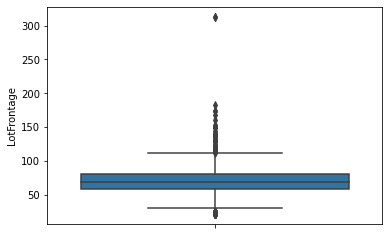

In [46]:
#checking outlier(outlier)
sns.boxplot(y='LotFrontage',data=dataset)

<AxesSubplot:ylabel='MasVnrArea'>

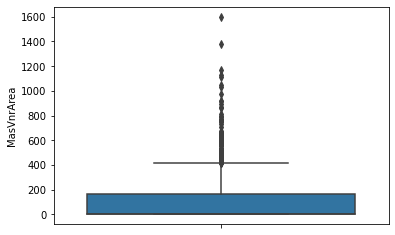

In [47]:
#outlier found
sns.boxplot(y='MasVnrArea',data=dataset)

In [48]:
#categorical data (using mode)
dataset['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [49]:
dataset['LotFrontage']=dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())

In [50]:
dataset['MasVnrArea']=dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].median())

In [51]:

dataset['GarageType'] = dataset['GarageType'].fillna(dataset.GarageType.mode()[0])

In [52]:
dataset.isnull().sum()

Id             0
LotFrontage    0
LotArea        0
MasVnrArea     0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageType     0
GarageArea     0
SalePrice      0
dtype: int64

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1460 non-null   int64  
 1   LotFrontage  1460 non-null   float64
 2   LotArea      1460 non-null   int64  
 3   MasVnrArea   1460 non-null   float64
 4   1stFlrSF     1460 non-null   int64  
 5   2ndFlrSF     1460 non-null   int64  
 6   GrLivArea    1460 non-null   int64  
 7   GarageType   1460 non-null   object 
 8   GarageArea   1460 non-null   int64  
 9   SalePrice    1460 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 114.2+ KB


In [54]:
#Encoding concept (bec of catogorical data)
dataset1 = pd.get_dummies(dataset, columns=['GarageType'])
print(dataset1.head())

   Id  LotFrontage  LotArea  MasVnrArea  1stFlrSF  2ndFlrSF  GrLivArea  \
0   1         65.0     8450       196.0       856       854       1710   
1   2         80.0     9600         0.0      1262         0       1262   
2   3         68.0    11250       162.0       920       866       1786   
3   4         60.0     9550         0.0       961       756       1717   
4   5         84.0    14260       350.0      1145      1053       2198   

   GarageArea  SalePrice  GarageType_2Types  GarageType_Attchd  \
0         548     208500                  0                  1   
1         460     181500                  0                  1   
2         608     223500                  0                  1   
3         642     140000                  0                  0   
4         836     250000                  0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0       

In [55]:
dataset1.shape

(1460, 15)

In [56]:
dataset1.columns

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'SalePrice', 'GarageType_2Types',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd'],
      dtype='object')

In [57]:
dataset1.head()

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1,65.0,8450,196.0,856,854,1710,548,208500,0,1,0,0,0,0
1,2,80.0,9600,0.0,1262,0,1262,460,181500,0,1,0,0,0,0
2,3,68.0,11250,162.0,920,866,1786,608,223500,0,1,0,0,0,0
3,4,60.0,9550,0.0,961,756,1717,642,140000,0,0,0,0,0,1
4,5,84.0,14260,350.0,1145,1053,2198,836,250000,0,1,0,0,0,0


In [58]:
# split the data into independent_variable (x) and dependent_variable (y)
x = dataset1[['LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'GarageType_2Types',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd']]
x.head()


,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,65.0,8450,196.0,856,854,1710,548,0,1,0,0,0,0
1,80.0,9600,0.0,1262,0,1262,460,0,1,0,0,0,0
2,68.0,11250,162.0,920,866,1786,608,0,1,0,0,0,0
3,60.0,9550,0.0,961,756,1717,642,0,0,0,0,0,1
4,84.0,14260,350.0,1145,1053,2198,836,0,1,0,0,0,0


In [59]:
#dependent variable
y = dataset1['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [60]:
# split the data into training and test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state = 100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 13)
(292, 13)
(1168,)
(292,)


In [61]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [62]:
y_pred = reg.predict(x_test)
y_pred

array([113769.21630951, 194878.03668768, 165722.95748913, 211282.73646119,
       145120.86103164, 233706.48926938, 213536.74803573, 267012.08183464,
        94171.90287771, 197870.93190312, 191801.33171418, 178401.14382608,
       201382.96736385, 192603.27848307, 119237.03530237, 104517.93951656,
       193739.73306114, 108629.79636995, 140268.33114046, 129657.09170479,
       174400.01596442,  91597.2098859 , 169776.17873925, 123153.56021112,
       190827.87481205,  88100.22437653,  40327.50934359,  99343.23240587,
       194619.19842986, 161538.51715347, 177021.55663433, 180278.93077124,
       242246.71324435,  85603.30193326, 105192.33484471,  83302.35274759,
        96659.90570276, 121619.46848191, 194671.6360856 , 143227.56841185,
       261278.16740519, 203771.8489422 , 234648.95229006, 102929.11277472,
       173780.39533794,  84118.36858259, 283913.28883502, 134287.92490146,
       142895.24783739,  64121.99248818, 248616.08177818, 150283.35923392,
       307111.76027806, 2

In [64]:
print(reg.intercept_)
print(reg.coef_)

-18147.20885296914
[-1.86318733e+02  2.90264643e-01  5.77947722e+01  9.31018808e+01
  6.58117112e+01 -8.61426742e+00  1.17270554e+02 -7.14650252e+04
  3.81204688e+04  8.50981804e+03  4.63088111e+04 -2.70410895e+04
  5.56701679e+03]


In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.725209497031192

In [66]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [67]:
reg_model = smf.OLS(endog=y_train, exog=x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     204.4
Date:                Fri, 02 Jul 2021   Prob (F-statistic):          1.61e-275
Time:                        14:47:38   Log-Likelihood:                -14167.
No. Observations:                1168   AIC:                         2.836e+04
Df Residuals:                    1155   BIC:                         2.843e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
LotFrontage         -186.3187     71.510     -2.605      0.009    -326.623     -46.015
LotArea                0.2903      0.146      1.995      0.046       0.005       0.576
MasVnrArea            57.7948      8.109      7.127      0.000      41.885      73.704
1stFlrSF              93.1019     28.689      3.245      0.001      36.814     149.390
2ndFlrSF              65.8117     28.535      2.306      0.021       9.826     121.798
GrLivArea             -8.6143     27.989     -0.308      0.758     -63.529      46.300
GarageArea           117.2706      7.725     15.180      0.000     102.113     132.428
GarageType_2Types  -8.961e+04   2.36e+04     -3.796      0.000   -1.36e+05   -4.33e+04
GarageType_Attchd   1.997e+04   6023.183      3.316      0.001    8155.654    3.18e+04
GarageType_Basment -9637.3908   1.32e+04     -0.731      0.465   -3.55e+04    1.62e+04
GarageType_BuiltIn  2.816e+04   8327.286      3.382      0.001    1.18e+04    4.45e+04
GarageType_CarPort -4.519e+04   1.81e+04     -2.503      0.012   -8.06e+04   -9770.956
GarageType_Detchd  -1.258e+04   5451.735     -2.308      0.021   -2.33e+04   -1883.779
==============================================================================
Omnibus:                      310.434   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19505.940
Skew:                          -0.213   Prob(JB):                         0.00
Kurtosis:                      23.016   Cond. No.                     2.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#Dropping GarageType Variable
dataset.drop('GarageType', axis = 1, inplace = True)
dataset.head()

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice
0,1,65.0,8450,196.0,856,854,1710,548,208500
1,2,80.0,9600,0.0,1262,0,1262,460,181500
2,3,68.0,11250,162.0,920,866,1786,608,223500
3,4,60.0,9550,0.0,961,756,1717,642,140000
4,5,84.0,14260,350.0,1145,1053,2198,836,250000


In [70]:
dataset.columns

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'SalePrice'],
      dtype='object')

In [71]:
#Independent and Dependent variable
x = dataset[['LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea',]]
x.head()
y = dataset['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [73]:
#Test Train Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state = 100)


In [74]:
#Model creation
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()

In [75]:
reg1.fit(x_train, y_train)

LinearRegression()

In [76]:
y_pred1 = reg1.predict(x_test)
y_pred1

array([129957.2638894 , 184994.88926804, 155220.67467411, 200470.66459156,
       134692.46094993, 228643.8742347 , 204929.52720665, 267539.00090673,
       111271.71069097, 194553.64607296, 177590.20228695, 166333.25185385,
       197489.63556024, 183952.02474486, 106845.78662572,  99238.89265066,
       183637.1354011 , 100175.43525187, 129394.32663843, 117088.71483379,
       196212.22118216, 113458.16359073, 198245.79182982, 124934.70054683,
       179719.82221139, 107600.15929485,  22450.08271931, 117355.70883081,
       186069.25630833, 151978.00253216, 196051.45439658, 172523.16934468,
       229116.91969383,  73437.97014318, 123227.97365635, 102516.53054854,
       115987.31640733, 114437.66673917, 218726.49655496, 133333.8815991 ,
       258700.94824603, 196251.74795556, 229091.29580808, 121549.98805226,
       164503.14894558,  70703.39707836, 282466.99277475, 152422.2033419 ,
       132221.43167633,  81078.73734401, 248622.73330397, 162868.51551855,
       308854.88871105, 2

In [77]:
#Model evaluation
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.7099164249210489

In [78]:
#OLS method
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf1

In [79]:
reg_model1 = smf1.OLS(endog=y_train, exog=x_train).fit()
reg_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              2686.
Date:                Fri, 02 Jul 2021   Prob (F-statistic):                        0.00
Time:                        15:13:42   Log-Likelihood:                         -14236.
No. Observations:                1168   AIC:                                  2.849e+04
Df Residuals:                    1161   BIC:                                  2.852e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
LotFrontage  -124.0255     66.071     -1.877      0.061    -253.658       5.607
LotArea         0.3162      0.153      2.068      0.039       0.016       0.616
MasVnrArea     67.4030      8.298      8.123      0.000      51.122      83.684
1stFlrSF      127.9994     30.051      4.259      0.000      69.039     186.960
2ndFlrSF       96.1686     29.968      3.209      0.001      37.371     154.966
GrLivArea     -35.5520     29.473     -1.206      0.228     -93.379      22.275
GarageArea    106.5920      7.987     13.346      0.000      90.922     122.262
==============================================================================
Omnibus:                      343.626   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16679.958
Skew:                          -0.547   Prob(JB):                         0.00
Kurtosis:                      21.481   Cond. No.                         685.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1. Inclusion of Catogorical variable 'GarageType': r2_score: 72.5 & Adjusted R squared: 67.7



#2. Enclusion of Catogorical variable 'GarageType': r2_score: 70.9 & Adjusted R squared: 94.1